In [7]:
import pandas as pd
import torch
import re
import matplotlib.pyplot as plt

In [10]:
training_log_file = 'training.log'

# Create a dataframe from the training log with the epoch, train loss, and validation loss (filter lines by regex)
# 2025-01-19 15:15:37 INFO | Epoch 155 train loss: 0.0993, val loss: 0.1339
log_lines = []
with open(training_log_file, 'r') as f:
    for line in f:
        if re.search(r'Epoch \d+ train loss: \d+\.\d+, val loss: \d+\.\d+', line):
            log_lines.append(line)

log_data = []
for line in log_lines:
    epoch = int(re.search(r'Epoch (\d+)', line).group(1))
    train_loss = float(re.search(r'train loss: (\d+\.\d+)', line).group(1))
    val_loss = float(re.search(r'val loss: (\d+\.\d+)', line).group(1))
    log_data.append([epoch, train_loss, val_loss])

training_log_df = pd.DataFrame(log_data, columns=['epoch', 'train_loss', 'val_loss'])
training_log_df.head()

,epoch,train_loss,val_loss
0,0,0.7508,0.5875
1,1,0.5727,0.4128
2,2,0.3826,0.3099
3,3,0.2816,0.2743
4,4,0.2421,0.2553


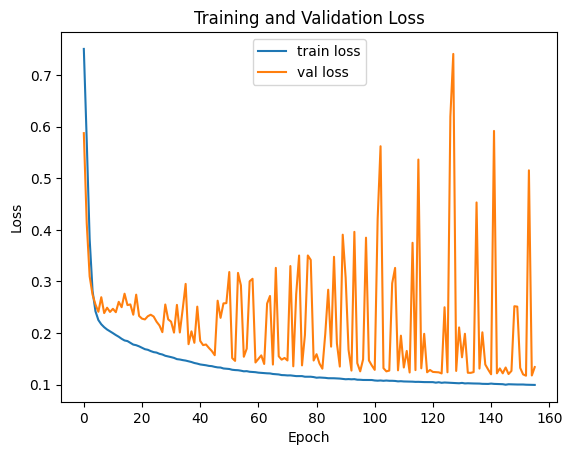

In [15]:
# plot the training and validation loss
plt.plot(training_log_df['epoch'], training_log_df['train_loss'], label='train loss')
plt.plot(training_log_df['epoch'], training_log_df['val_loss'], label='val loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()